## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Load the Dataset

In [3]:
fighting_data = pd.read_csv("/content/drive/MyDrive/firefighter_training_data_10kg_extinguisher_1min.csv")

## Examine the Dataset

In [4]:
fighting_data.shape

(5000, 9)

In [6]:
fighting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time_Taken          5000 non-null   int64  
 1   Extinguisher_Used   5000 non-null   float64
 2   Incorrect_Actions   5000 non-null   int64  
 3   Aiming_Accuracy     5000 non-null   float64
 4   Distance_From_Fire  5000 non-null   float64
 5   Assessment_Time     5000 non-null   int64  
 6   Movement_Speed      5000 non-null   float64
 7   High_Temp_Time      5000 non-null   int64  
 8   Outcome             5000 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 351.7 KB


In [5]:
fighting_data.head()

,Time_Taken,Extinguisher_Used,Incorrect_Actions,Aiming_Accuracy,Distance_From_Fire,Assessment_Time,Movement_Speed,High_Temp_Time,Outcome
0,60,10.0,2,0.48,4.6,6,0.5,25,0
1,45,10.0,9,0.61,1.1,8,0.6,5,1
2,60,10.0,1,0.34,4.1,7,1.5,52,1
3,34,7.7,10,0.38,3.0,15,0.9,15,1
4,42,10.0,4,0.84,2.3,12,1.0,25,1


In [7]:
fighting_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time_Taken,5000.0,48.677400,10.121058,30.0,40.00,50.00,60.0000,60.0
Extinguisher_Used,5000.0,9.842340,0.559299,5.9,10.00,10.00,10.0000,10.0
Incorrect_Actions,5000.0,5.007800,3.144474,0.0,2.00,5.00,8.0000,10.0
Aiming_Accuracy,5000.0,0.649128,0.204794,0.3,0.47,0.65,0.8225,1.0
Distance_From_Fire,5000.0,2.970580,1.159956,1.0,2.00,2.90,4.0000,5.0
Assessment_Time,5000.0,9.983000,3.164919,5.0,7.00,10.00,13.0000,15.0
Movement_Speed,5000.0,0.899940,0.348669,0.3,0.60,0.90,1.2000,1.5
High_Temp_Time,5000.0,21.834000,11.630421,5.0,12.00,20.00,30.0000,55.0
Outcome,5000.0,0.751200,0.432361,0.0,1.00,1.00,1.0000,1.0


array([[<Axes: title={'center': 'Time_Taken'}>,
        <Axes: title={'center': 'Extinguisher_Used'}>,
        <Axes: title={'center': 'Incorrect_Actions'}>],
       [<Axes: title={'center': 'Aiming_Accuracy'}>,
        <Axes: title={'center': 'Distance_From_Fire'}>,
        <Axes: title={'center': 'Assessment_Time'}>],
       [<Axes: title={'center': 'Movement_Speed'}>,
        <Axes: title={'center': 'High_Temp_Time'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

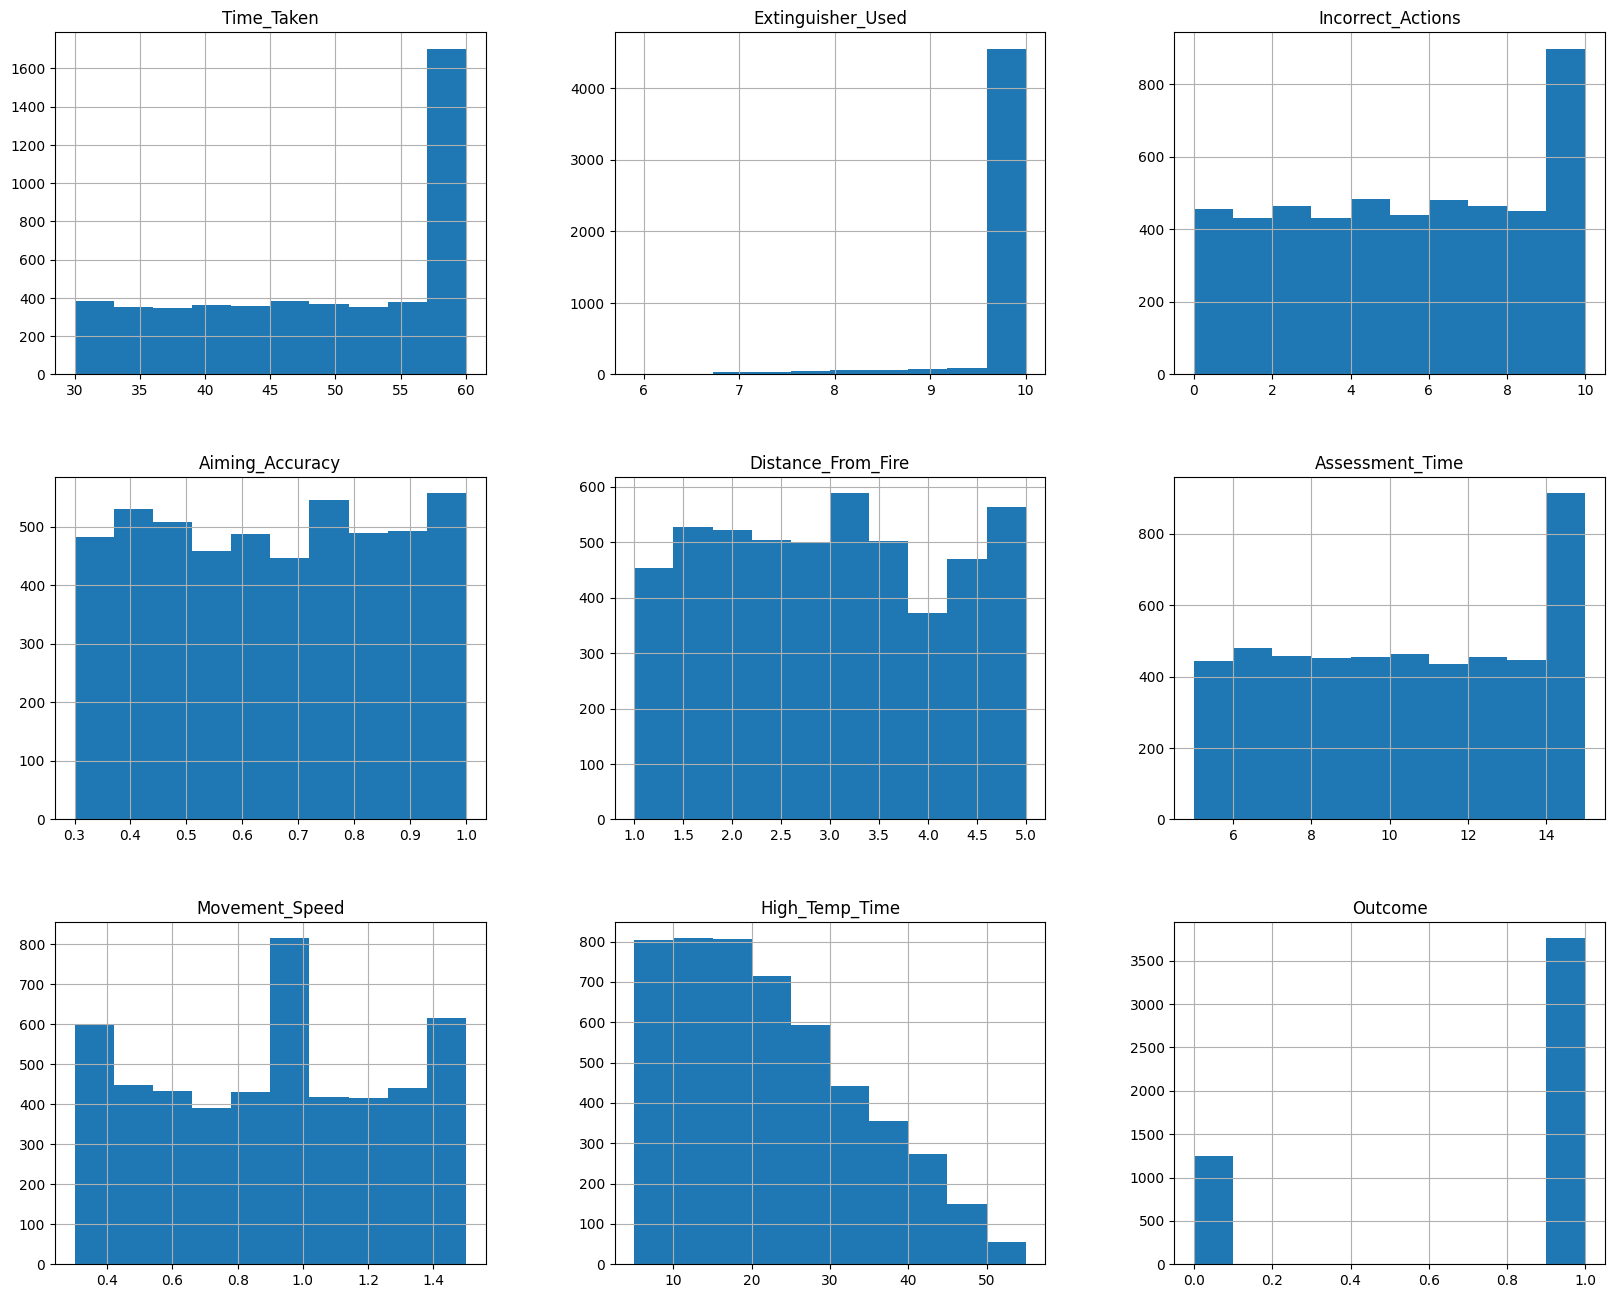

In [8]:
fighting_data.hist(figsize=(20, 16))

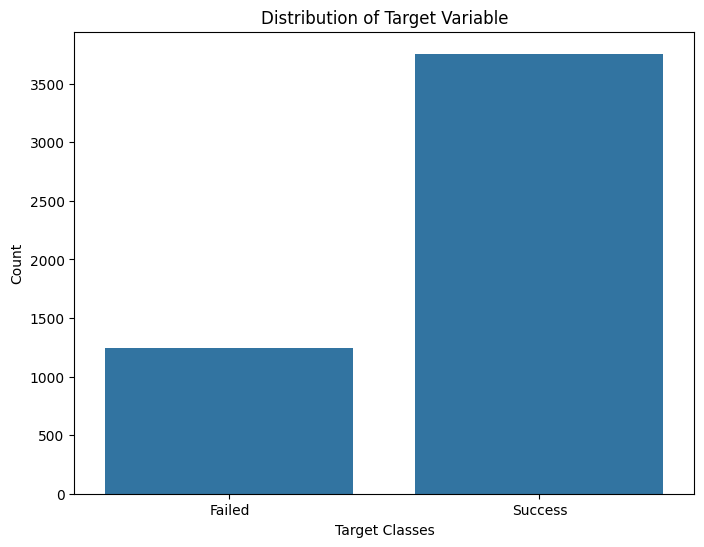

In [9]:
new_fighting_data = pd.read_csv("/content/drive/MyDrive/firefighter_training_data_10kg_extinguisher_1min.csv")
class_label_mapping = {0: "Failed", 1: "Success"}
new_fighting_data["target_class"] = new_fighting_data["Outcome"].map(class_label_mapping)

plt.figure(figsize=(8, 6))
sns.countplot(
    x="target_class", data=new_fighting_data, order=["Failed", "Success"]
)
plt.title("Distribution of Target Variable")
plt.xlabel("Target Classes")
plt.ylabel("Count")

plt.show()

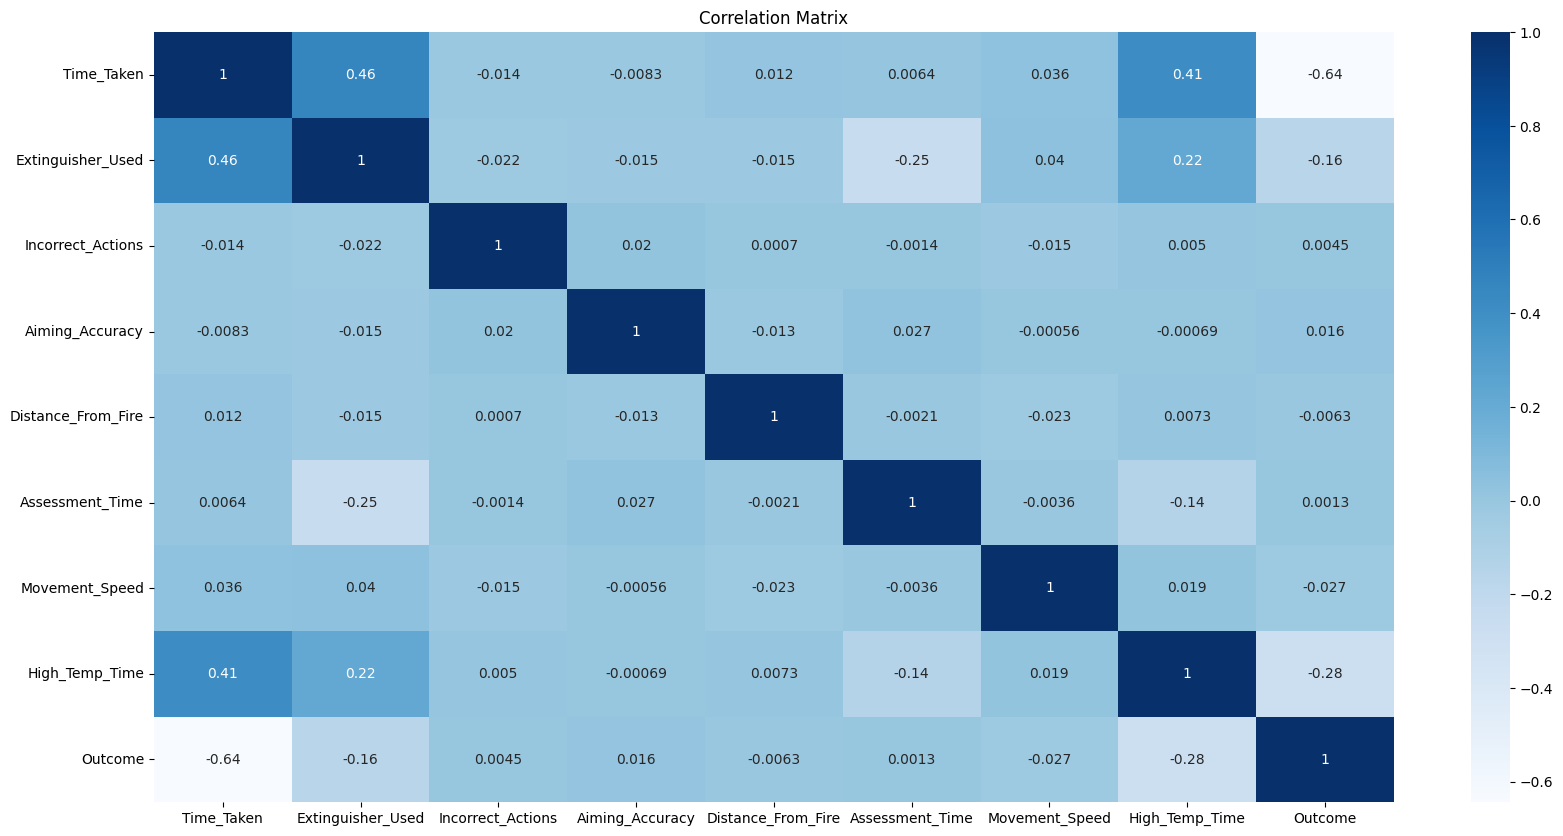

In [10]:
corr_matrix = fighting_data.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

In [12]:
fighting_data.isnull().sum()

,0
Time_Taken,0
Extinguisher_Used,0
Incorrect_Actions,0
Aiming_Accuracy,0
Distance_From_Fire,0
Assessment_Time,0
Movement_Speed,0
High_Temp_Time,0
Outcome,0


In [13]:
fighting_data.duplicated().sum()

0

In [14]:
fighting_data["Outcome"].value_counts()

,count
Outcome,
1,3756
0,1244


## Setting Target

In [15]:
X_normal = fighting_data.drop("Outcome", axis=1)
Y = fighting_data["Outcome"]

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
Scaler = StandardScaler()
X = Scaler.fit_transform(X_normal)
X = pd.DataFrame(X, columns=X_normal.columns)
X.head()

,Time_Taken,Extinguisher_Used,Incorrect_Actions,Aiming_Accuracy,Distance_From_Fire,Assessment_Time,Movement_Speed,High_Temp_Time
0,1.118829,0.281917,-0.956631,-0.825929,1.404866,-1.258610,-1.147161,0.272244
1,-0.363378,0.281917,1.269719,-0.191080,-1.612792,-0.626619,-0.860328,-1.447556
2,1.118829,0.281917,-1.274681,-1.509612,0.973772,-0.942614,1.721172,2.593975
3,-1.450329,-3.830782,1.587769,-1.314274,0.025366,1.585349,0.000172,-0.587656
4,-0.659819,0.281917,-0.320531,0.932114,-0.578166,0.637363,0.287005,0.272244


In [18]:
Y.value_counts()

,count
Outcome,
1,3756
0,1244


## Train-Test Split

In [19]:
# 80% of the data will be used for training
# 20% of the data will be used for testing

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

## Model Training and Evaluation

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

##Logistic Regression
Logistic Regression is a statistical model and a classification algorithm that models the probability of a binary outcome (1/0, True/False, Yes/No) based on one or more predictor variables. It uses the logistic function to model the probability and makes predictions by applying a threshold to the predicted probabilities.

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best Hyperparameters for Logistic Regression: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy of Logistic Regression model: 97.90%

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       250
           1       1.00      0.97      0.99       750

    accuracy                           0.98      1000
   macro avg       0.96      0.99      0.97      1000
weighted avg       0.98      0.98      0.98      1000



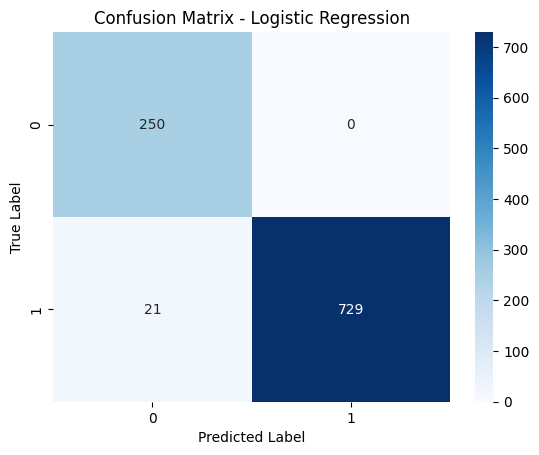

In [22]:
# Define the parameter grid for Logistic Regression
logreg_param_grid = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-3, 3, 7),
    "solver": ["liblinear"],
}

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Perform grid search with cross-validation
logreg_grid_search = GridSearchCV(
    logreg_model, logreg_param_grid, cv=5, scoring="accuracy"
)
logreg_grid_search.fit(X_train, Y_train)

# Get the best parameters
best_logreg_params = logreg_grid_search.best_params_
print("Best Hyperparameters for Logistic Regression:", best_logreg_params)

# Train a Logistic Regression model with the best parameters
best_logreg_model = LogisticRegression(random_state=42, **best_logreg_params)
best_logreg_model.fit(X_train, Y_train)

# Make predictions on the test set
logreg_predict = best_logreg_model.predict(X_test)

# Calculate accuracy on the test set
best_logreg_acc = accuracy_score(Y_test, logreg_predict)
print(
    "Best Accuracy of Logistic Regression model:",
    "{:.2f}%".format(best_logreg_acc * 100),
)

# Display classification report
print("\nClassification Report - Logistic Regression:")
lr_cr = classification_report(Y_test, logreg_predict)
print(lr_cr)

# Display confusion matrix
logreg_cm = confusion_matrix(Y_test, logreg_predict)

# Plot the confusion matrix
sns.heatmap(logreg_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##Decision Tree
A Decision Tree is a supervised machine learning algorithm that recursively splits the dataset into subsets based on the most significant attribute, creating a tree-like structure of decisions to predict the target variable.

In [23]:
from sklearn.tree import DecisionTreeClassifier

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of Decision Tree with Best Parameters: 97.90%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       250
           1       1.00      0.97      0.99       750

    accuracy                           0.98      1000
   macro avg       0.96      0.99      0.97      1000
weighted avg       0.98      0.98      0.98      1000



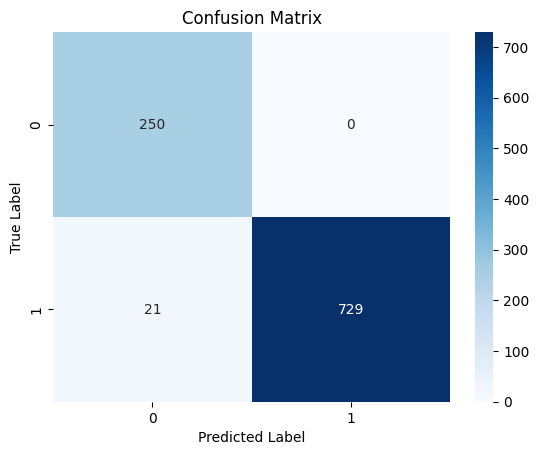

In [24]:
# Define the parameter grid
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": np.arange(1, 21),
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
}

# Create a Decision Tree model
DT = DecisionTreeClassifier(random_state=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(DT, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a Decision Tree with the best parameters
best_DT = DecisionTreeClassifier(random_state=0, **best_params)
best_DT.fit(X_train, Y_train)

# Make predictions on the test set
DT_predict = best_DT.predict(X_test)

# Calculate accuracy on the test set
max_dt_acc = accuracy_score(Y_test, DT_predict)
print(
    "Accuracy of Decision Tree with Best Parameters:",
    "{:.2f}%".format(max_dt_acc * 100),
)

# Display classification report
print("\nClassification Report:")
dt_cr = classification_report(Y_test, DT_predict)
print(dt_cr)

# Display confusion matrix
DT_cm = confusion_matrix(Y_test, DT_predict)

# Plot the confusion matrix
sns.heatmap(DT_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Deep Neural Network Models

In [27]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (4000, 8)
X_test shape: (1000, 8)


## CNN

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,250 (4.88 KB)

 Trainable params: 1,250 (4.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7145 - loss: 0.6185 - val_accuracy: 0.7425 - val_loss: 0.4369
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7691 - loss: 0.4112 - val_accuracy: 0.8550 - val_loss: 0.3315
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8140 - loss: 0.3493 - val_accuracy: 0.8913 - val_loss: 0.2725
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8414 - loss: 0.3109 - val_accuracy: 0.8988 - val_loss: 0.2444
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8622 - loss: 0.2845 - val_accuracy: 0.9050 - val_loss: 0.2218
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8743 - loss: 0.2606 - val_accuracy: 0.9112 - val_loss: 0.2057
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8845 - loss: 0.2428 - val_accuracy: 0.9175 - val_loss: 0.1989
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8844 - loss: 0.2431 - val_accuracy: 0.

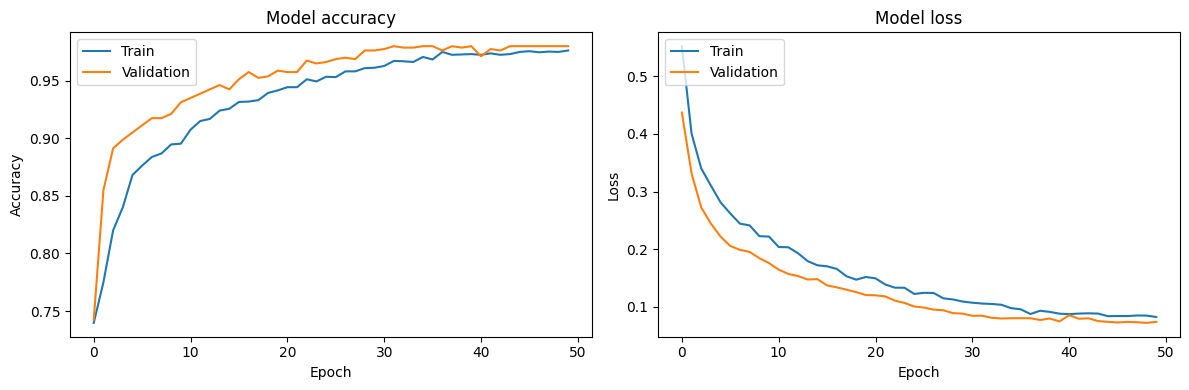

In [29]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Data is already in numpy format, just normalize it
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Get number of features and classes
num_features = X_train.shape[1]  # 8 features
num_classes = len(np.unique(Y_train))

# Create the Neural Network model
model = Sequential([
    # Input layer
    Dense(16, activation='relu', input_shape=(num_features,)),
    Dropout(0.2),

    # Hidden layer
    Dense(32, activation='relu'),
    Dropout(0.2),

    # Hidden layer
    Dense(16, activation='relu'),
    Dropout(0.2),

    # Output layer
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
print("Model Architecture:")
model.summary()

# Train the model
history = model.fit(X_train, Y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_classes))

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## LSTM

Model Architecture:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 64)               │          18,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,666 (123.70 KB)

 Trainable params: 31,666 (123.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7106 - loss: 0.6219 - val_accuracy: 0.7588 - val_loss: 0.3323
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8468 - loss: 0.2875 - val_accuracy: 0.9475 - val_loss: 0.1760
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9359 - loss: 0.1806 - val_accuracy: 0.9625 - val_loss: 0.1350
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9304 - loss: 0.1640 - val_accuracy: 0.9538 - val_loss: 0.1263
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9416 - loss: 0.1456 - val_accuracy: 0.9575 - val_loss: 0.1192
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9511 - loss: 0.1307 - val_accuracy: 0.9688 - val_loss: 0.1087
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9544 - loss: 0.1235 - val_accuracy: 0.9613 - val_loss: 0.1049
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9556 - loss: 0.1206 - val_accuracy: 0

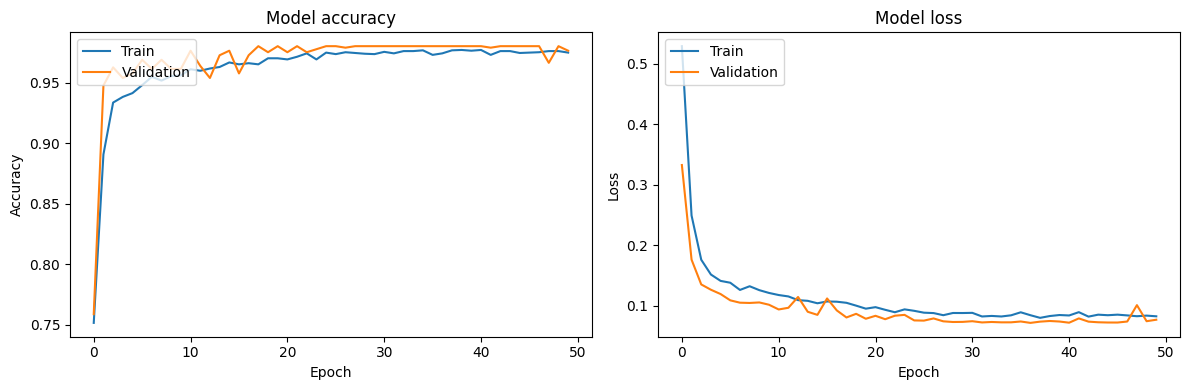

In [30]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Reshape input data for LSTM [samples, timesteps, features]
# For LSTM, we need 3D data: (samples, timesteps, features)
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Get number of features and classes
num_features = X_train.shape[1]  # 8 features
num_classes = len(np.unique(Y_train))

# Create the LSTM model
model = Sequential([
    # LSTM layer
    LSTM(64, input_shape=(1, num_features), return_sequences=True),
    Dropout(0.3),

    # Second LSTM layer
    LSTM(32, return_sequences=False),
    Dropout(0.3),

    # Dense layers for classification
    Dense(16, activation='relu'),
    Dropout(0.2),

    # Output layer
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
print("Model Architecture:")
model.summary()

# Train the model
history = model.fit(X_train_reshaped, Y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model
Y_pred = model.predict(X_test_reshaped)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_classes))

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## FNN

Model Architecture:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,450 (79.88 KB)

 Trainable params: 19,874 (77.63 KB)

 Non-trainable params: 576 (2.25 KB)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6119 - loss: 0.8475 - val_accuracy: 0.7550 - val_loss: 0.4535
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7910 - loss: 0.4649 - val_accuracy: 0.8500 - val_loss: 0.3367
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8351 - loss: 0.3743 - val_accuracy: 0.9275 - val_loss: 0.2377
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8437 - loss: 0.3558 - val_accuracy: 0.9250 - val_loss: 0.2073
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8699 - loss: 0.2994 - val_accuracy: 0.9200 - val_loss: 0.1969
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8694 - loss: 0.2949 - val_accuracy: 0.9262 - val_loss: 0.1873
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8932 - loss: 0.2610 - val_accuracy: 0.9337 - val_loss: 0.1687
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8930 - loss: 0.2414 - val_acc

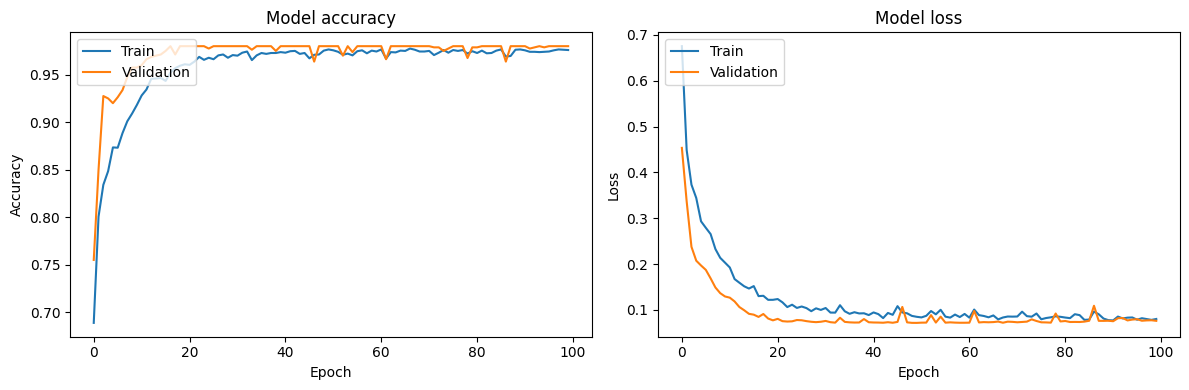

In [31]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Get number of features and classes
num_features = X_train.shape[1]  # 8 features
num_classes = len(np.unique(Y_train))

# Create the FNN model
model = Sequential([
    # Input layer
    Dense(64, activation='relu', input_shape=(num_features,)),
    BatchNormalization(),
    Dropout(0.3),

    # Hidden layer 1
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Hidden layer 2
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Hidden layer 3
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    # Output layer
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
print("Model Architecture:")
model.summary()

# Train the model
history = model.fit(X_train, Y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_classes))

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()